# CLR Callback

In [1]:
from clr import *
from keras.optimizers import *

Using Theano backend.
Using gpu device 1: GeForce GTX TITAN X (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5110)
/home/bckenstler/anaconda3/envs/py36/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


## Test Set

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

In [3]:
inp = Input(shape=(15,))                
x = Dense(10, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)

model = Model(inp, x)

In [4]:
X = np.random.rand(2000000,15)

In [5]:
Y = np.random.randint(0,2,size=2000000)

## Callback test

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

The following tests callback functionality for each default Keras optimizer.

Tests demonstrate expected cyclical behavior, as well as functionality of resetting the cycles and/or adjusting boundary values.

### SGD

In [7]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

In [9]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

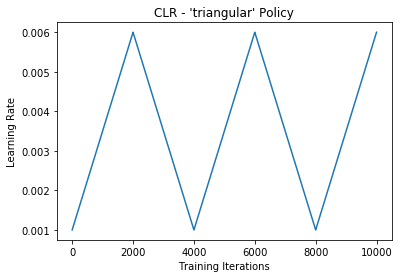

In [11]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.plot(i, lr)


In [20]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [22]:
clr_triangular._reset()

In [23]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

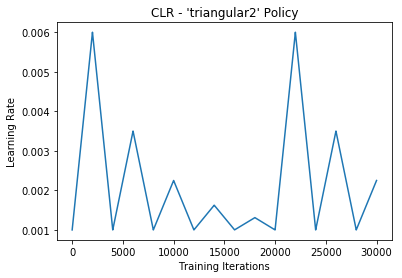

In [24]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular2' Policy")
plt.plot(i, lr)


In [25]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

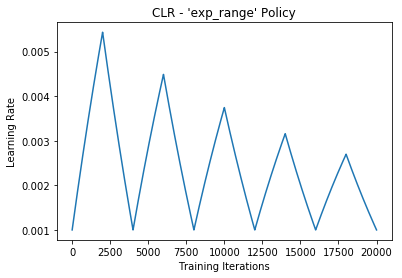

In [27]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'exp_range' Policy")
plt.plot(i, lr)

In [22]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [23]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

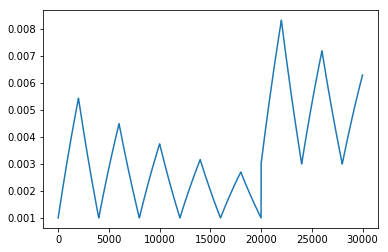

In [24]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [28]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [29]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

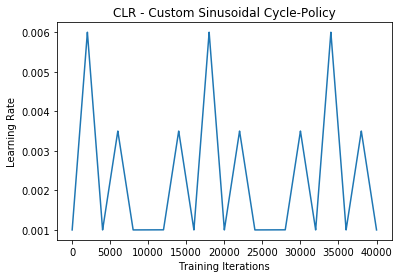

In [31]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Sinusoidal Cycle-Policy")
plt.plot(i, lr)


In [32]:
clr = lambda x: 1/(5**(x*0.0001))

In [33]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

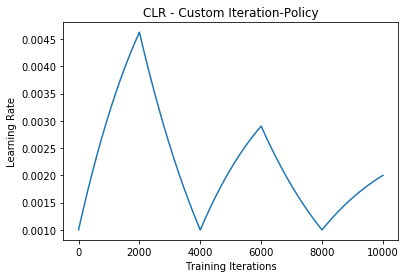

In [35]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Iteration-Policy")
plt.plot(i, lr)

### RMSprop

In [112]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [114]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

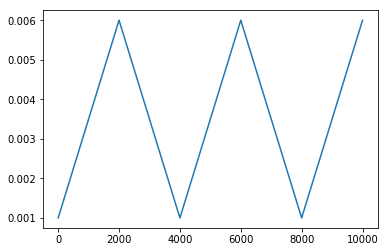

In [115]:
plt.plot(i, lr)

In [116]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [118]:
clr_triangular._reset()

In [119]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

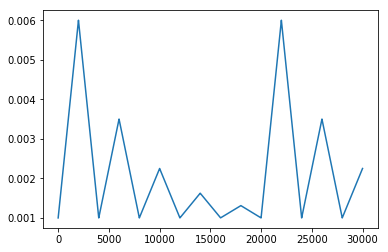

In [120]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [121]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

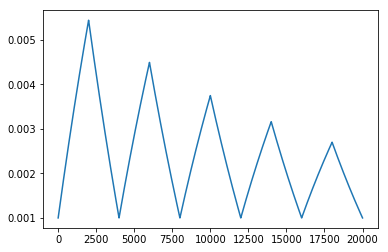

In [123]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [124]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [125]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

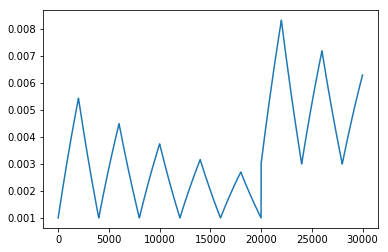

In [126]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [127]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [128]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [129]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

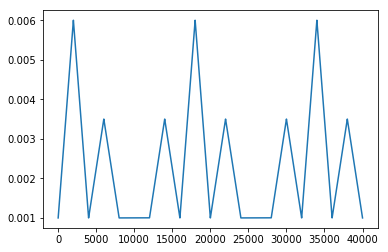

In [130]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [131]:
clr = lambda x: 1/(5**(x*0.0001))

In [132]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

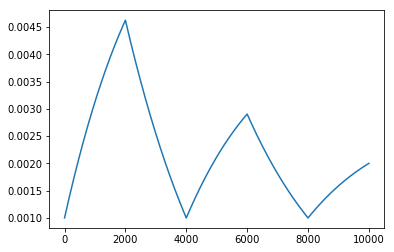

In [134]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)

### Adagrad

In [135]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [137]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

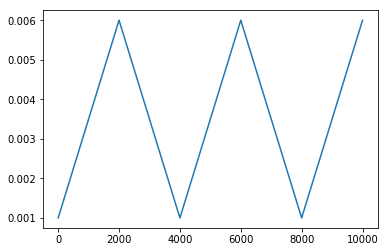

In [138]:
plt.plot(i, lr)

In [139]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [141]:
clr_triangular._reset()

In [142]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

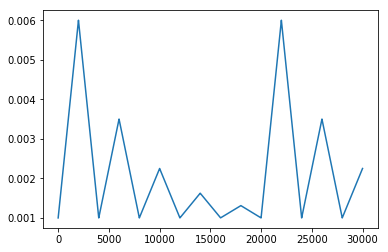

In [143]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [144]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

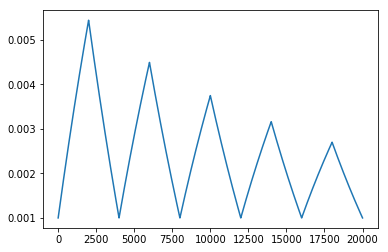

In [146]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [147]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [148]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

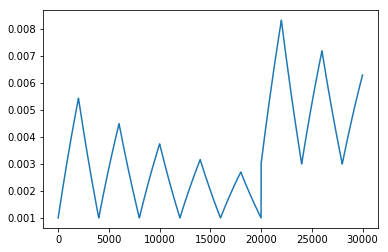

In [149]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [150]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [151]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

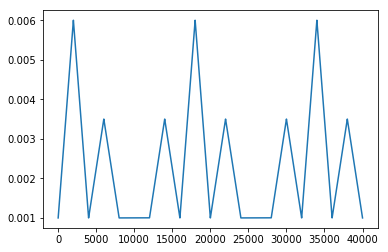

In [153]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [154]:
clr = lambda x: 1/(5**(x*0.0001))

In [155]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

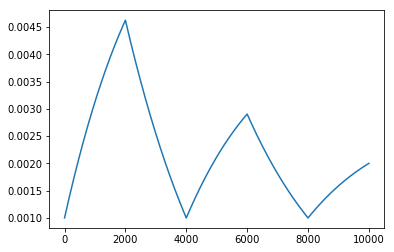

In [157]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)

### Adadelta

In [158]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [159]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [160]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

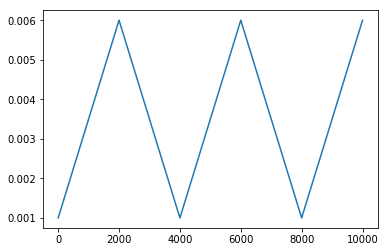

In [161]:
plt.plot(i, lr)

In [162]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [163]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [164]:
clr_triangular._reset()

In [165]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

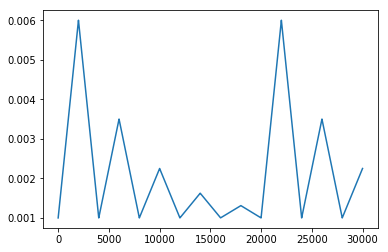

In [166]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [167]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

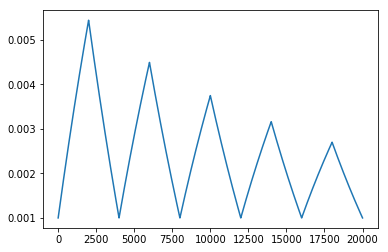

In [169]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [170]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [171]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

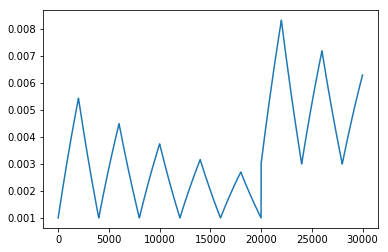

In [172]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [173]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [174]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [175]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

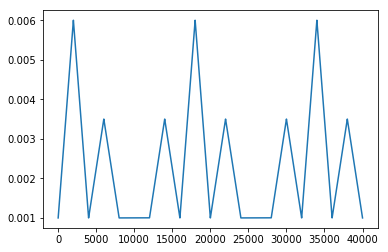

In [176]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [177]:
clr = lambda x: 1/(5**(x*0.0001))

In [178]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [179]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

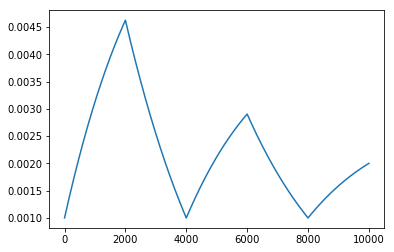

In [180]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)

### Adam

In [181]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [182]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [183]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

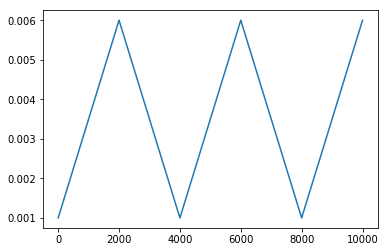

In [184]:
plt.plot(i, lr)

In [185]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [187]:
clr_triangular._reset()

In [188]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

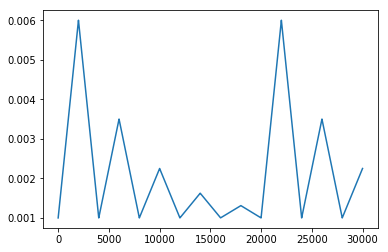

In [189]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [190]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [191]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

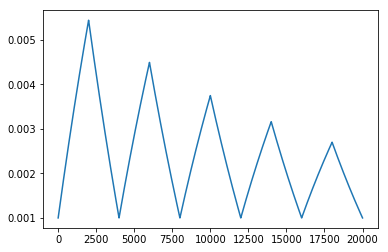

In [192]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [193]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [194]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

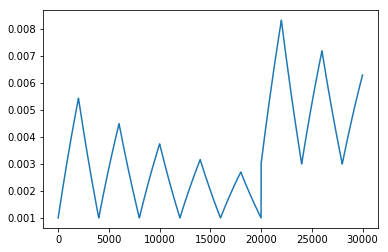

In [195]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [196]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [197]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [198]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

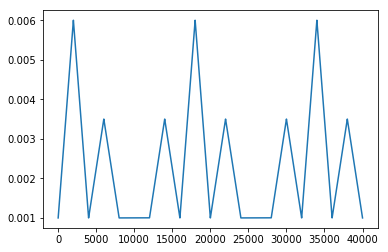

In [199]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [200]:
clr = lambda x: 1/(5**(x*0.0001))

In [201]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [202]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

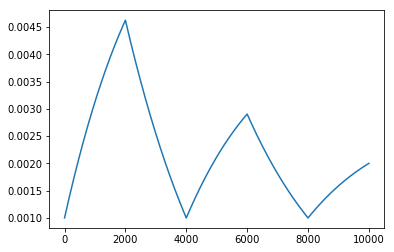

In [203]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)

### Adamax

In [204]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [205]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [206]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

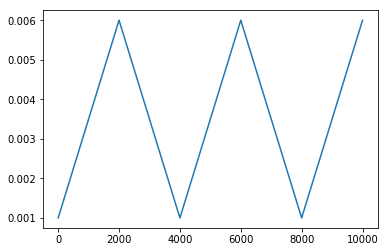

In [207]:
plt.plot(i, lr)

In [208]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [209]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [210]:
clr_triangular._reset()

In [211]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

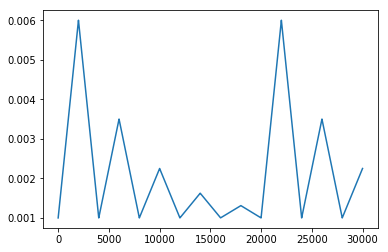

In [212]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [213]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [214]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

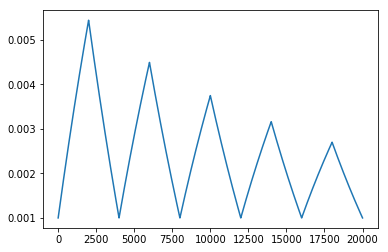

In [215]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [216]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [217]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

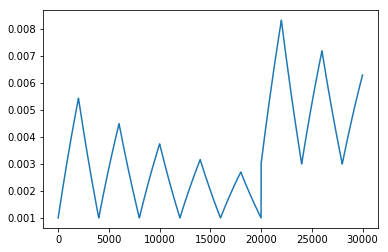

In [218]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [219]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [220]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [221]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

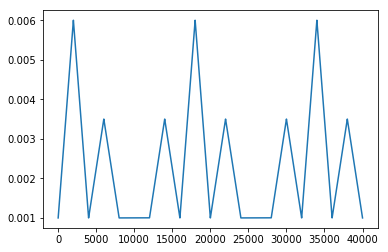

In [222]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [223]:
clr = lambda x: 1/(5**(x*0.0001))

In [224]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [225]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

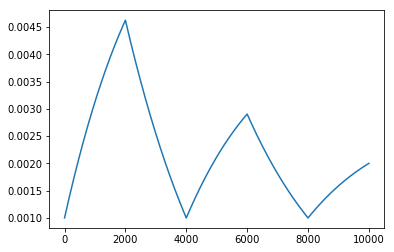

In [226]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)

### Nadam

In [227]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [228]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

In [229]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

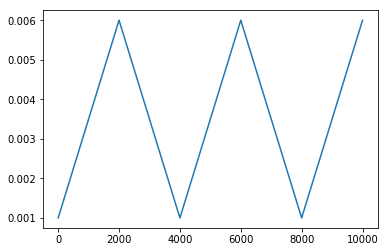

In [230]:
plt.plot(i, lr)

In [231]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [232]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [233]:
clr_triangular._reset()

In [234]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

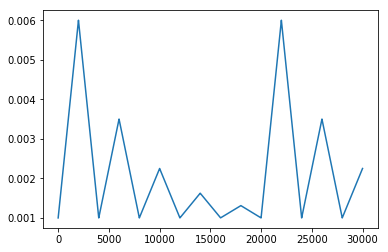

In [235]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [236]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [237]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

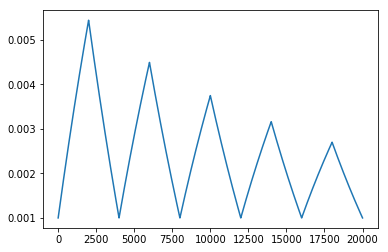

In [238]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [239]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [240]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

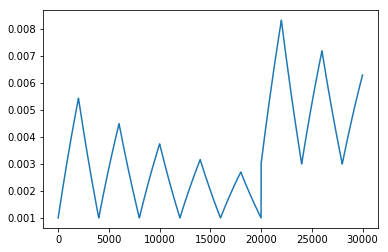

In [241]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [242]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [243]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [244]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

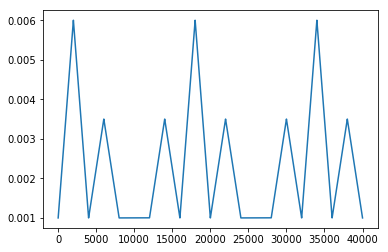

In [245]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)


In [246]:
clr = lambda x: 1/(5**(x*0.0001))

In [247]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [248]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

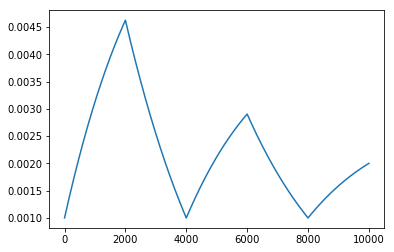

In [249]:
record = clr_triangular.record

i = [r[1] for r in record]
lr = [r[0] for r in record]

plt.plot(i, lr)